# The Series object

The <code>Series</code> is a one-dimensional labeled array for homogeneous data. The term *homogeneous* means that the values are of the sama data types.
    
Pandas assigns each <code>Series</code> value a *label*-and identifier we can use to locate the value. 
    
The <Series> is a one-dimensional data structure because we need one reference point to access a value: either a label or a position. 
    
 Let's create a <code>Series</code> object from the <code>Series</code> class. The first argument to the <code>Series</code> constructor is an iterable object whose values will populate the <code>Series</code>.

In [6]:
import pandas as pd

ice_cream_flavors = ["Chocolate","Vanilla","Strawberry","Rum Raisin",]

pd.Series(data = ice_cream_flavors)

0     Chocolate
1       Vanilla
2    Strawberry
3    Rum Raisin
dtype: object

In addition to an index position, we can assign each <code>Series</code> value an index label. Index labels can be of any immutable data type: strings, tuples, datetimes, etc. 

This flexibility makes a <code>Series</code> powerful: we can reference a valye by its order or by a key/label. In a sense, each value has two identifiers.

In [9]:
days_of_week = ("Monday", "Wednesday", "Friday", "Saturday")
# The two lines below are equivalent
pd.Series(ice_cream_flavors, days_of_week)
pd.Series(data = ice_cream_flavors, index = days_of_week)

Monday        Chocolate
Wednesday       Vanilla
Friday       Strawberry
Saturday     Rum Raisin
dtype: object

we can access the value <code>"Vanilla"</code> either by the index label  <code>"Wednesday" </code> or by index position 1

In [10]:
serie = pd.Series(ice_cream_flavors, days_of_week)
serie[1]

'Vanilla'

In [11]:
serie["Wednesday"]

'Vanilla'

The <code>dtype</code> statement at the bottom reflects the data type of the values in the <code>Series</code>. For most data types, pandas will display a predictable type (such as <code>bool</code>,<code>float</code>, or  <code>int</code>). For strings an more-complex objects (such as nested data structures), pandas will show <code>dtype:object<code>.

In [12]:
bunch_of_bools = [True, False, False]
pd.Series(bunch_of_bools)

0     True
1    False
2    False
dtype: bool

In [14]:
stock_prices = [985.32, 950.44]
time_of_day = ["Open", "Close"]
pd.Series(data = stock_prices, index = time_of_day)

Open     985.32
Close    950.44
dtype: float64

In [15]:
lucky_numbers = [4, 8, 15, 16, 23, 42]
pd.Series(lucky_numbers)

0     4
1     8
2    15
3    16
4    23
5    42
dtype: int64

The next example passes an integer list to the constructor but asks for a floating-point <code>Series</code>:

In [16]:
lucky_numbers = [4, 8, 15, 16, 23, 42]
pd.Series(lucky_numbers, dtype = "float")

0     4.0
1     8.0
2    15.0
3    16.0
4    23.0
5    42.0
dtype: float64

## Creating <code>Series</code> with missing values

When pandas sees a missing value during a file import, the library substitutes NumPy’s <code>nan</code> object: <code>nan</code> is a placeholder object that represents nullness or absence.

In [18]:
import numpy as np
temperatures = [94, 88, np.nan, 91]
pd.Series(data = temperatures)

0    94.0
1    88.0
2     NaN
3    91.0
dtype: float64

Notice that the Series dtype is float64 . Pandas automatically converts numeric values from integers to floating-points when it spots a <code>nan</code> value

## Creating a Series from Python objects

The <code>Series</code> constructor’s <code>data</code> parameter accepts various inputs, including native Python data structures and objects from other libraries.

In this section, we’ll explore how the <code>Series</code> constructor deals with dictionaries, tuples, and NumPy arrays.

When passed a dictionary, the constructor sets each key as a corresponding index label in the <code>Series</code>:

In [19]:
calorie_info = {"Cereal": 125,"Chocolate Bar": 406,"Ice Cream Sundae": 342,}
diet = pd.Series(calorie_info)
diet

Cereal              125
Chocolate Bar       406
Ice Cream Sundae    342
dtype: int64

When passed a tuple, the constructor populates the Series in an expected manner:

In [20]:
pd.Series(data = ("Red", "Green", "Blue"))

0      Red
1    Green
2     Blue
dtype: object

The <code>Series</code> constructor’s <code>data</code> parameter also accepts a NumPy <code>ndarray</code> object. The next example feeds the <code>Series</code> constructor an <code>ndarray</code> generated by NumPy’s <code>randint</code> function:

In [21]:
random_data = np.random.randint(1, 101, 10)
random_data

array([24, 42, 88, 57, 53, 36, 38, 74, 35, 71])

In [22]:
pd.Series(random_data)

0    24
1    42
2    88
3    57
4    53
5    36
6    38
7    74
8    35
9    71
dtype: int64

## Series attributes

The <code>values</code> attribute exposes object that stores the values:

In [26]:
diet = pd.Series(calorie_info)
diet.values

array([125, 406, 342])

Pandas delegates the responsibility of storing <code>Series</code> values to an object from a different library. That’s why NumPy is a dependency of pandas. The <code>ndarray</code> object optimizes for speed and efficiency by relying on the lower-level C programming language for many of its calculations. 

In many ways,the <code>Series</code> is a wrapper—an additional layer of functionality around a core NumPy library object.

The <code>index</code> attribute returns the <code>Index</code> object that stores the <code>Series</code> labels:

In [27]:
diet.index

Index(['Cereal', 'Chocolate Bar', 'Ice Cream Sundae'], dtype='object')

Some attributes reveal helpful details about the object. <code>dtype</code> , for example, returns the data type of the <code>Series</code>’ values:

In [28]:
diet.dtype

dtype('int64')

The <code>is_unique</code> attribute returns <code>True</code> if all <code>Series</code> values are unique:

In [29]:
diet.is_unique

True

## Mathematical operations

### Statistical operations

In [30]:
numbers = pd.Series([1, 2, 3, np.nan, 4, 5])
numbers

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
dtype: float64

The <code>count</code> method counts the number of non-null values:

In [32]:
numbers.count()

5

The <code>sum</code> method adds the <code>Series</code>’ values together:

In [34]:
numbers.sum()

15.0

Most mathematical methods ignore missing values by default. We can pass an argument of <code>False</code> to the <code>skipna</code> parameter to force the inclusion of missing values.

In [35]:
numbers.sum(skipna = False)

nan

The <code>product</code> method multiplies all <code>Series</code> values together:

In [ ]:
numbers.product()

The <code>cumsum</code> (cumulative sum) method returns a new <code>Series</code> with a rolling sum of values. Each index position holds the sum of values up to and including the value at that index. A cumulative sum helps determine which values contribute most to the total:

In [37]:
numbers

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
dtype: float64

In [36]:
numbers.cumsum()

0     1.0
1     3.0
2     6.0
3     NaN
4    10.0
5    15.0
dtype: float64

The mean method returns the average of the values in the Series .

In [38]:
numbers.mean()

3.0

The median method returns the middle number in a sorted Series of values

In [39]:
numbers.median()

3.0

The std method returns the standard deviation, a measure of the variation in the data

In [40]:
numbers.std()

1.5811388300841898

The max and min methods retrieve the largest and smallest value from the Series :

In [ ]:
numbers.max(),numbers.min()

describe returns a Series of statistical evaluations, including count, mean, and standard deviation:

In [41]:
numbers.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

The sample method selects a random assortment of values from the Series .

In [42]:
numbers.sample(3)

2    3.0
1    2.0
5    5.0
dtype: float64

### Arithmetic operations
Pandas gives us additional ways to perform arithmetic calculations with a Series .

In [43]:
s1 = pd.Series(data = [5, np.nan, 15], index = ["A", "B", "C"])
s1

A     5.0
B     NaN
C    15.0
dtype: float64

We can perform arithmetic on a Series with Python’s standard mathematical operators:
* <code>+</code> for addition
* <code>-</code> for subtraction
* <code>/</code> for multiplication
* <code>*</code> for division

The next example adds 3 to each value in the s1 Series :

In [44]:
s1 + 3

A     8.0
B     NaN
C    18.0
dtype: float64

If you prefer a method-based approach, the add method achieves the same result:

In [45]:
s1.add(3)

A     8.0
B     NaN
C    18.0
dtype: float64

The next three examples show the complementary syntax options for subtraction ( <code>-</code> ), multiplication ( <code>*</code>), and division ( <code>/</code> ). Often, there are multiple ways to accomplish the same operation in pandas:

In [46]:
s1 - 5
s1.sub(5)

A     0.0
B     NaN
C    10.0
dtype: float64

In [47]:
s1 * 2
s1.mul(2)

A    10.0
B     NaN
C    30.0
dtype: float64

In [48]:
s1 / 2
s1.div(2)

A    2.5
B    NaN
C    7.5
dtype: float64

### Broadcasting

Recall that pandas stores its Series values in a NumPy ndarray under the hood.

The NumPy documentation uses the term broadcasting to describe the derivation of one array of values from another.

Broadcasting also describes mathematical operations between multiple Series objects.

**As a rule of thumb, pandas uses shared index labels to align values across different data structures.**

Let’s instantiate two Series with the same three-element index:

In [50]:
s1 = pd.Series([1, 2, 3], index = ["A", "B", "C"])
s2 = pd.Series([4, 5, 6], index = ["A", "B", "C"])
s1 + s2

A    5
B    7
C    9
dtype: int64

Comparison operations between Series become trickier when the indices differ. One index may have a greater or smaller number of labels, or there may be a mismatch between the labels themselves.

The next example creates two Series that share only two index labels, B and C:
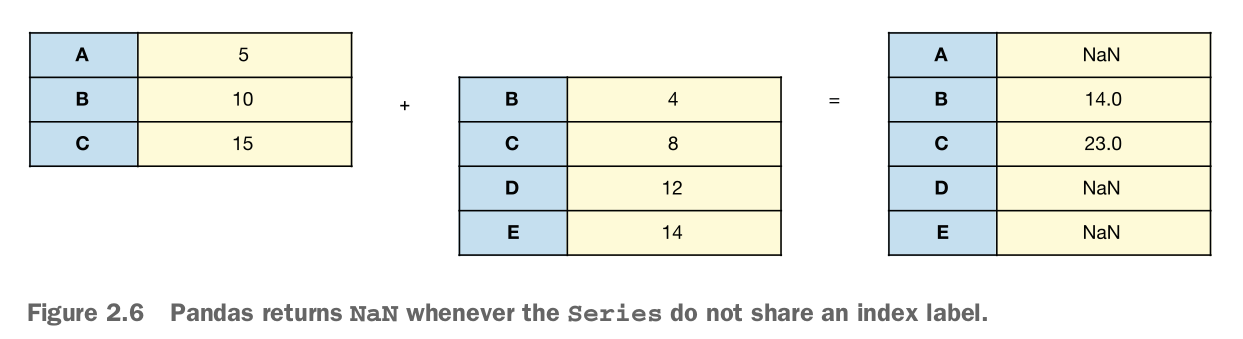

In [54]:
s1 = pd.Series(
data = [5, 10, 15], index = ["A", "B", "C"]
)
s2 = pd.Series(
data = [4, 8, 12, 14], index = ["B", "C", "D", "E"]
)

s1 + s2

A     NaN
B    14.0
C    23.0
D     NaN
E     NaN
dtype: float64

In [55]:
pd.Series([2,4,6]) + pd.Series([10,10,10,10])

0    12.0
1    14.0
2    16.0
3     NaN
dtype: float64